In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
display(x_train.shape)
display(x_test.shape)

(60000, 28, 28)

(10000, 28, 28)

In [5]:
x_train = x_train/255
x_test = x_test/255

x_train1 = x_train
x_test1 = x_test

x_train = np.expand_dims(x_train, axis = 3)
y_test = np.expand_dims(x_test, axis = 3)

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)



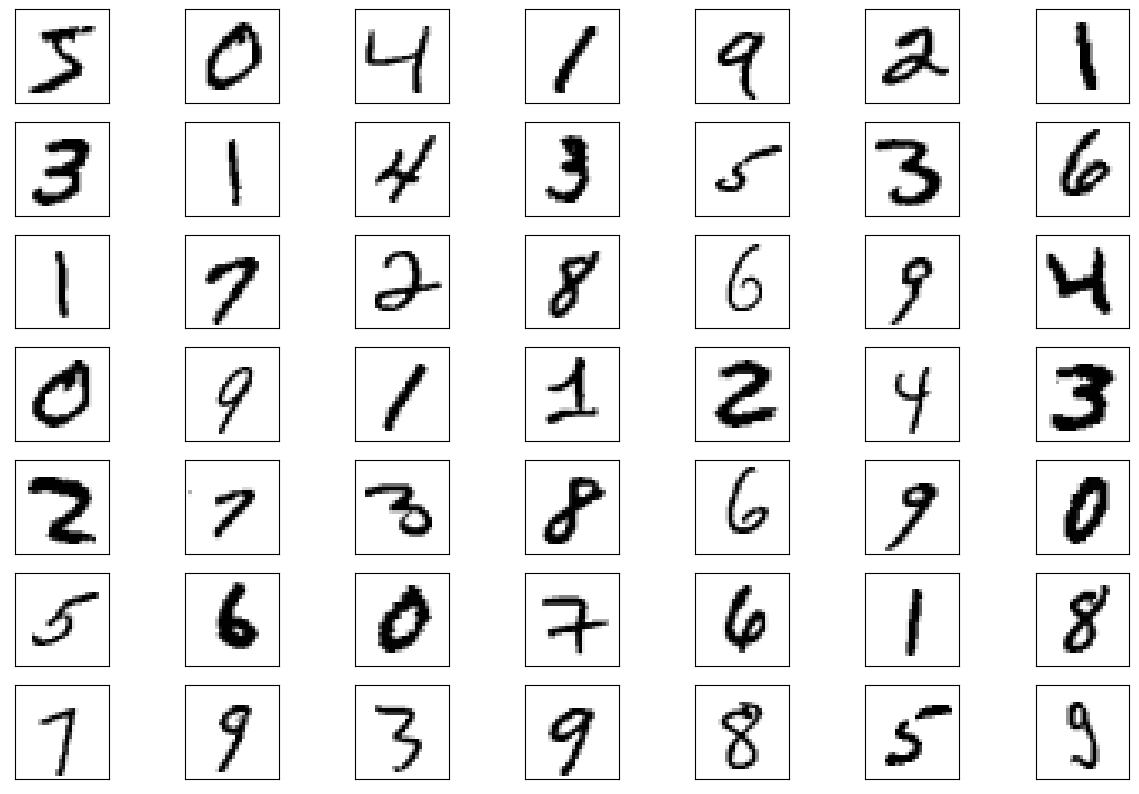

In [6]:
plt.figure(figsize=(15,10))
for i in range(49):
    plt.subplot(7, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
plt.show()

In [7]:
model = keras.Sequential([ 
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (28, 28, 1)), 
    MaxPooling2D((2,2), strides=2), 
    Conv2D(64, (3,3), padding='same', activation='relu'), 
    MaxPooling2D((2,2), strides=2), 
    Flatten(), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [9]:
model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [11]:
his = model.fit(x_train, y_train_cat, batch_size=16, epochs=20, validation_split=0.2)

Epoch 1/20
3000/3000 [==============================] - 40s 13ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0697 - val_accuracy: 0.9868
Epoch 2/20
3000/3000 [==============================] - 40s 13ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0510 - val_accuracy: 0.9907
Epoch 3/20
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0512 - val_accuracy: 0.9901
Epoch 4/20
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0507 - val_accuracy: 0.9905
Epoch 5/20
3000/3000 [==============================] - 38s 13ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0861 - val_accuracy: 0.9864
Epoch 6/20
3000/3000 [==============================] - 37s 12ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0523 - val_accuracy: 0.9912
Epoch 7/20
3000/3000 [==============================] - 36s 12ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0633 -

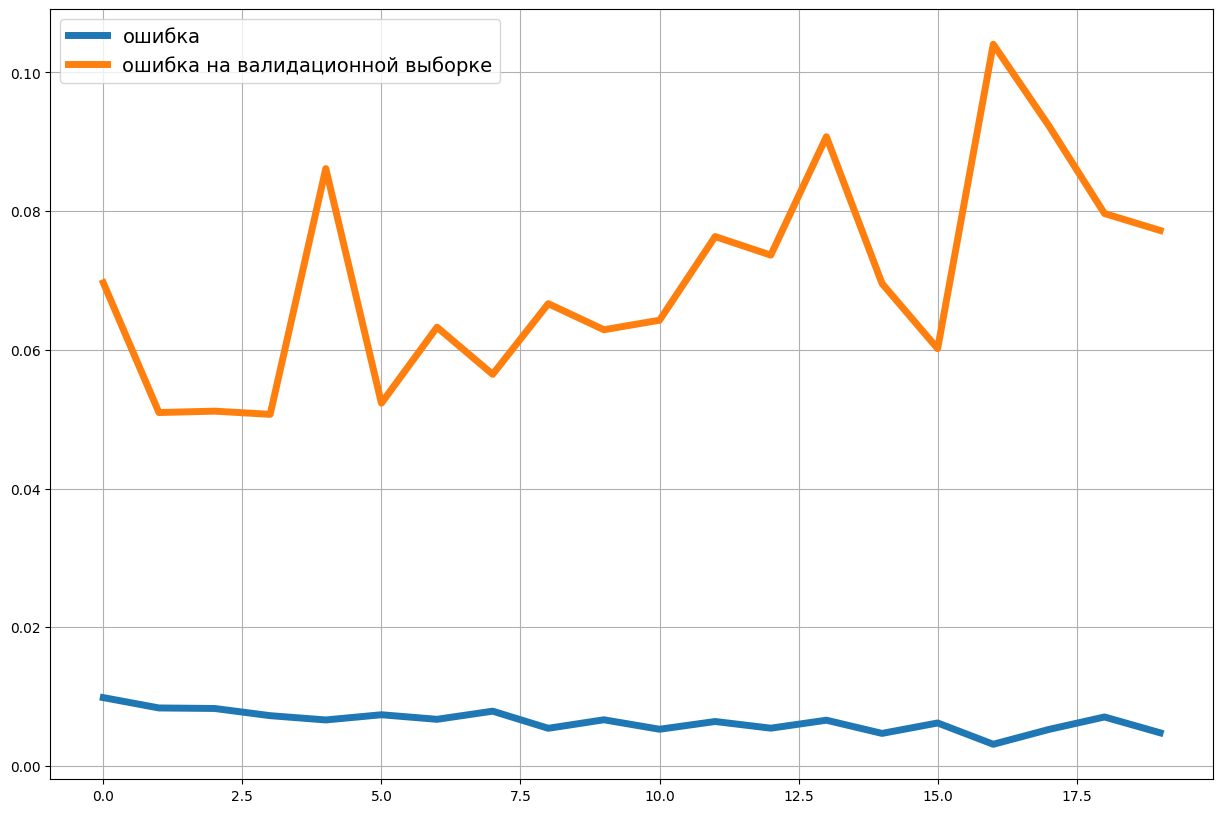

In [12]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(his.history['loss'], lw = 5, label = 'ошибка')
ax.plot(his.history['val_loss'], lw = 5, label = 'ошибка на валидационной выборке')
ax.legend(fontsize=14)
plt.grid(True)
plt.show()

In [13]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis = 1)

313/313 [==============================] - 2s 6ms/step


In [14]:
import pandas as pd

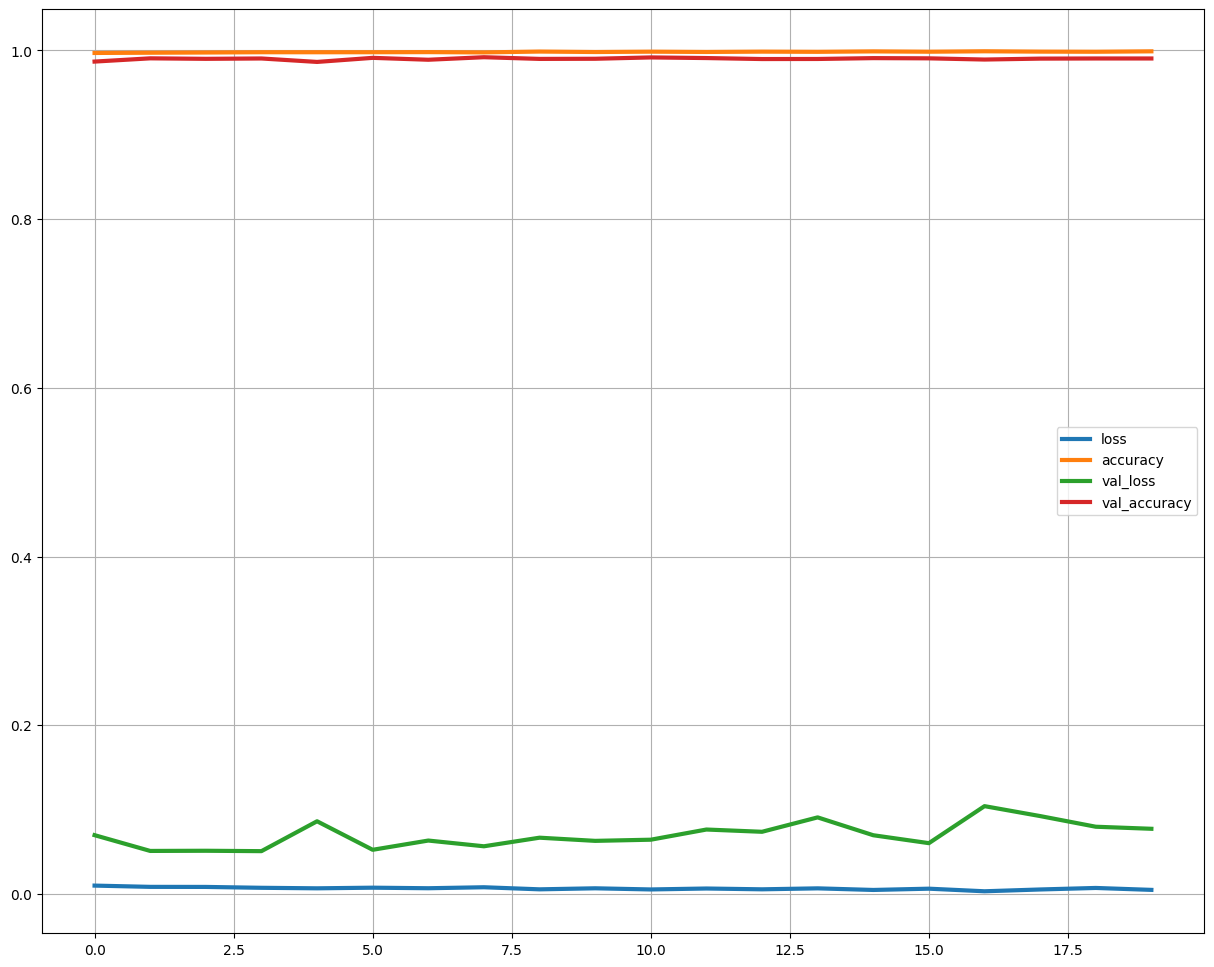

In [15]:
pd.DataFrame(his.history).plot(figsize = (15,12), grid = True, lw = 3);